In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from derivative import dxdt
from scipy.integrate import solve_ivp
import lorenz_utils_edmd as lorenz
import rossler_utils_edmd as rossler
import edmd

from scipy.integrate import solve_ivp
from scipy.integrate import odeint


In [6]:


def test2(u0,A,t0,tmax,dt):

    n = int(tmax/dt)
    t = np.linspace(start=t0,stop=tmax,num=n)
    print(A)
    print(A.shape)
    trajec = solve_ivp(fun=dudt,
                       t_span=(t0,tmax),
                       y0=u0,
                       t_eval=t,
                       args=(A,))
    
    u = trajec.y.T

    return t,u

def test(u0,A,t0,tmax,dt):

    n = int(tmax/dt)
    t = np.linspace(start=t0,stop=tmax,num=n)
    trajec = odeint(dudt,
                       u0,
                       t,
                       args=(A,))
    
    u = trajec.y.T

    return t,u

# Lorenz Attractor

In [7]:
SIGMA = 10
RHO = 28
BETA = 8/3
T0 = 0.001
DT = 0.001
T = 80
P_order = 2
threshold = 0.25
lorenz_params =[SIGMA,RHO,BETA]
u0 = np.array([0,8,27])
Eta = 250

In [8]:
t,U,UP = lorenz.generate_data(u0,T0,T,DT,lorenz_params)
tn,Un,UPn = lorenz.generate_noisy_data(Eta,u0,T0,T,DT,lorenz_params)

In [9]:
ThetaR, ThetaRd = lorenz.trial_function_eval(np.transpose(U), np.transpose(UP))
A=edmd.findA(ThetaR, ThetaRd)
ThetaRn, ThetaRdn = lorenz.trial_function_eval(np.transpose(Un), np.transpose(UPn))
An=edmd.findA(ThetaRn, ThetaRdn)

In [10]:
edmd_time, edmd_data = lorenz.edmd_lorenz_trajectory(u0,A[0:3],T0,T,DT)

[[-9.96181291  9.97377533  0.          0.          0.          0.
   0.          0.          0.        ]
 [27.65112248 -0.84707329  0.          0.          0.          0.
   0.         -0.98901179  0.        ]
 [ 0.          0.         -2.65153233  0.          0.          0.
   0.99415628  0.          0.        ]]
(3, 9)


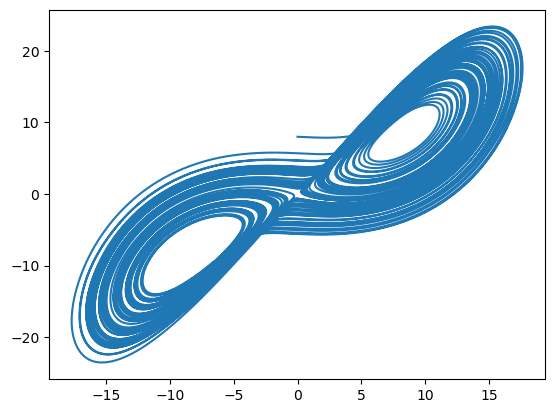

In [11]:
plt.plot(edmd_data.T[0],edmd_data.T[1])

NameError: name 'x' is not defined

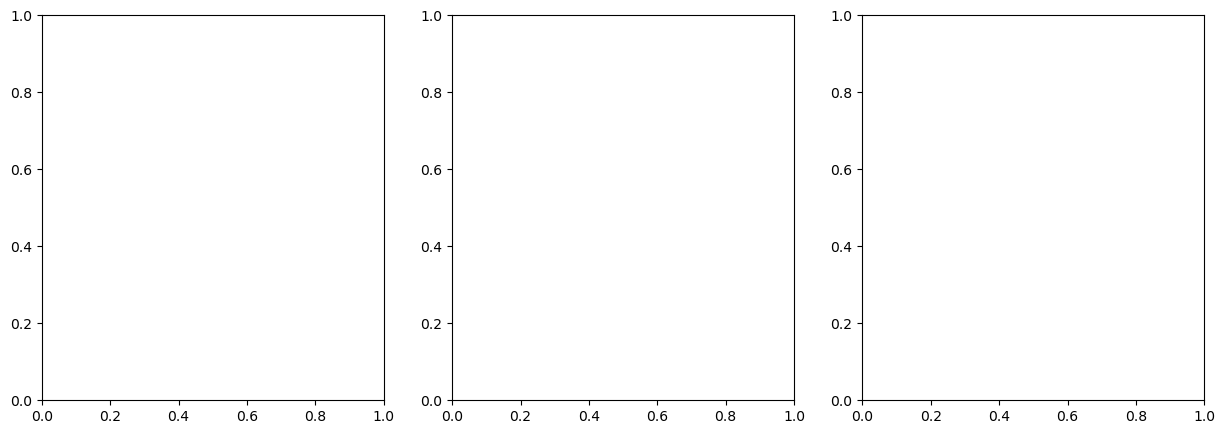

In [12]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x, y)
ax1.set_title("X & Y")
ax2.plot(x, z)
ax2.set_title("X & Z")
ax3.plot(y, z)
ax3.set_title("Y & Z")
plt.show()

In [ ]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(x1, y1)
ax1.set_title("X & Y")
ax2.plot(x1, z1)
ax2.set_title("X & Z")
ax3.plot(y1, z1)
ax3.set_title("Y & Z")
plt.show()

NameError: name 'plt' is not defined